In [1]:
# Importing the Libraries
import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os
class_names = os.listdir('./../natural_images/')
print(class_names)

['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']


In [3]:
count = []
print("Class : Total Images")
print("-------------")
for label in class_names:
    path = '../natural_images/{0}/'.format(label)
    folder_data = os.listdir(path)
    images_count = len(folder_data)
    count.append(images_count)
    print(label + " : " + str(images_count))

Class : Total Images
-------------
airplane : 727
car : 968
cat : 885
dog : 702
flower : 843
fruit : 1000
motorbike : 788
person : 986


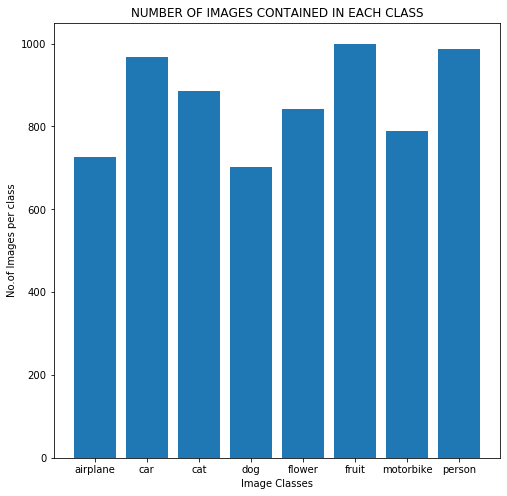

In [4]:
# Distribution of images per each class
plt.figure(figsize = (8,8))
plt.bar(class_names, count)
plt.title('NUMBER OF IMAGES CONTAINED IN EACH CLASS')
plt.xlabel('Image Classes')
plt.ylabel('No.of Images per class')
plt.show()

In [5]:
# Reading the Data 
images_data =[]
images_labels = []
import cv2
for label in class_names:
    path = '../natural_images/{0}/'.format(label)
    folder_data = os.listdir(path)
    for image_path in folder_data:
        image = cv2.imread(path+image_path)
        image_resized = cv2.resize(image, (32,32))
        images_data.append(np.array(image_resized))
        images_labels.append(label)

In [6]:
# Converting the data to Numpy arrays
images_data = np.array(images_data)
images_labels = np.array(images_labels)

In [7]:
images_data.shape

(6899, 32, 32, 3)

In [8]:
images_labels.shape

(6899,)

In [9]:
# Shuffling the Data as we have all the image labels as groups
indices = np.arange(images_data.shape[0])
np.random.shuffle(indices)
images_data = images_data[indices]
images_labels = images_labels[indices]

In [10]:
# Encoding the class Names & converting to categorical values
from sklearn.preprocessing import LabelEncoder
encoded_images_labels = LabelEncoder().fit_transform(images_labels)

In [11]:
from keras.utils import to_categorical
categorical_images_labels = to_categorical(encoded_images_labels)

In [12]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(images_data, categorical_images_labels, test_size = 0.25)

In [13]:
# Model Implementation
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(len(class_names), activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1605888   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 2

In [15]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy'])

In [16]:
history = model.fit(X_train, Y_train, epochs=10, validation_split=0.2)

Epoch 1/10
130/130 [==============================] - 3s 27ms/step - loss: 10.1690 - accuracy: 0.3967 - val_loss: 1.2347 - val_accuracy: 0.6068
Epoch 2/10
130/130 [==============================] - 3s 25ms/step - loss: 1.1297 - accuracy: 0.6448 - val_loss: 1.1060 - val_accuracy: 0.6725
Epoch 3/10
130/130 [==============================] - 4s 34ms/step - loss: 0.7370 - accuracy: 0.7652 - val_loss: 0.9146 - val_accuracy: 0.7198
Epoch 4/10
130/130 [==============================] - 5s 36ms/step - loss: 0.6327 - accuracy: 0.7932 - val_loss: 0.9290 - val_accuracy: 0.7014
Epoch 5/10
130/130 [==============================] - 4s 33ms/step - loss: 0.5215 - accuracy: 0.8169 - val_loss: 0.8633 - val_accuracy: 0.7681
Epoch 6/10
130/130 [==============================] - 4s 33ms/step - loss: 0.4485 - accuracy: 0.8521 - val_loss: 0.7721 - val_accuracy: 0.7662
Epoch 7/10
130/130 [==============================] - 4s 34ms/step - loss: 0.4255 - accuracy: 0.8703 - val_loss: 0.9794 - val_accuracy: 0.706

In [17]:
model.save('image_classifier.h5')

In [18]:
image_classifier = load_model('image_classifier.h5')
y_pred = image_classifier.predict_classes(X_test)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([7, 1, 7, ..., 3, 7, 4], dtype=int64)

In [19]:
#converting y test to actual labels.
y_test = np.argmax(Y_test, axis = 1)
y_test

array([7, 1, 7, ..., 3, 7, 4], dtype=int64)

In [20]:
# Accuracy calculation
from sklearn.metrics import accuracy_score
print('The Accuracy is:', accuracy_score(y_pred,y_test) * 100)

The Accuracy is: 75.82608695652175


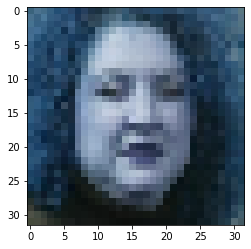

Actual Value for :person
Predicted Value for : person



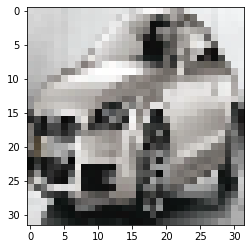

Actual Value for :car
Predicted Value for : car



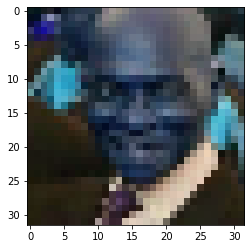

Actual Value for :person
Predicted Value for : person



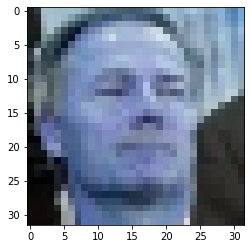

Actual Value for :person
Predicted Value for : person



In [21]:
# Predicting the Result for few test images
for i in range(0,4):
    plt.imshow(X_test[i,:,:])  
    plt.show()
    predicted_value = image_classifier.predict(X_test[[i],:])
    predict_classes = image_classifier.predict_classes(X_test[[i],:])
    actual_value = Y_test[[i],:]
    print("Actual Value for :" + str(class_names[np.argmax(actual_value)]))
    print("Predicted Value for : "  + str(class_names[predict_classes[0]])+'\n')

# Implementing model with Scaling the data



In [22]:
# Scaling the data
images_data_scaled = images_data / 255

In [23]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(images_data_scaled, categorical_images_labels, test_size = 0.25)

In [24]:
history1 = model.fit(X_train, Y_train, epochs=10, validation_data=(X_test,Y_test))

Epoch 1/10
162/162 [==============================] - 5s 33ms/step - loss: 1.1202 - accuracy: 0.6036 - val_loss: 0.5924 - val_accuracy: 0.8052
Epoch 2/10
162/162 [==============================] - 6s 38ms/step - loss: 0.6177 - accuracy: 0.7915 - val_loss: 0.5000 - val_accuracy: 0.8290
Epoch 3/10
162/162 [==============================] - 6s 39ms/step - loss: 0.5073 - accuracy: 0.8210 - val_loss: 0.4191 - val_accuracy: 0.8562
Epoch 4/10
162/162 [==============================] - 5s 33ms/step - loss: 0.4372 - accuracy: 0.8463 - val_loss: 0.3779 - val_accuracy: 0.8568
Epoch 5/10
162/162 [==============================] - 6s 36ms/step - loss: 0.3957 - accuracy: 0.8632 - val_loss: 0.3569 - val_accuracy: 0.8690
Epoch 6/10
162/162 [==============================] - 5s 34ms/step - loss: 0.3533 - accuracy: 0.8738 - val_loss: 0.3500 - val_accuracy: 0.8672
Epoch 7/10
162/162 [==============================] - 6s 35ms/step - loss: 0.3190 - accuracy: 0.8885 - val_loss: 0.3280 - val_accuracy: 0.8823

In [25]:
model.save('image_classifier_scaled.h5')
img_classifier_scaled_model =  load_model('image_classifier_scaled.h5')
y_pred = img_classifier_scaled_model.predict_classes(X_test)
y_pred

array([7, 7, 2, ..., 7, 0, 2], dtype=int64)

In [26]:
#converting y test to actual labels.
y_test = np.argmax(Y_test, axis = 1)
y_test

array([7, 7, 2, ..., 7, 0, 2], dtype=int64)

In [27]:
print('The Accuracy is:', accuracy_score(y_pred,y_test) * 100)

The Accuracy is: 88.05797101449275


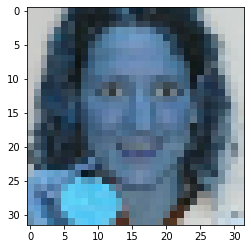

Actual Value for :person
Predicted Value for : person



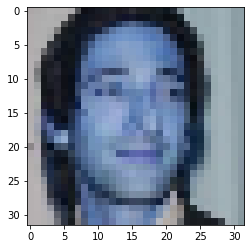

Actual Value for :person
Predicted Value for : person



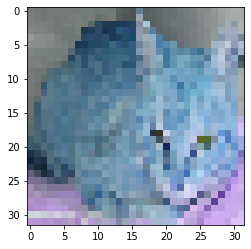

Actual Value for :cat
Predicted Value for : cat



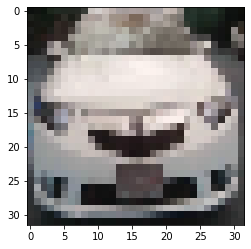

Actual Value for :car
Predicted Value for : car



In [28]:
# Predicting the Result for few test images
for i in range(0,4):
    plt.imshow(X_test[i,:,:])  
    plt.show()
    predicted_value = img_classifier_scaled_model.predict(X_test[[i],:])
    predict_classes = img_classifier_scaled_model.predict_classes(X_test[[i],:])
    actual_value = Y_test[[i],:]
    print("Actual Value for :" + str(class_names[np.argmax(actual_value)]))
    print("Predicted Value for : "  + str(class_names[predict_classes[0]])+'\n')